### Import packages

In [1]:
import torch
from dataset import Dataset
from learn import train, test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Setup running device

In [2]:
use_gpu = True
device = "cuda" if use_gpu and torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### Load dataset

In [3]:
features = [
    'v_enc_dim300',
    'v_freq_freq',
    'v_deg',
    'v_sense',
    'e_vertexsim',
    'e_dir', 'e_rel',
    'e_weightsource',
    'e_srank_rel',
    'e_trank_rel',
    'e_sense'
]

split_frac = 0.8
dataset = Dataset(features, split_frac, device)

loading v_enc_dim300
loading v_freq_freq
loading v_deg
loading v_sense
loading e_vertexsim
loading e_dir
loading e_rel
loading e_weightsource
loading e_srank_rel
loading e_trank_rel
loading e_sense
loading problem plain texts
loading labeled pairs


### Setup training and model configurations

In [10]:
feature_enc_len = 20
feature_enc_type = 'proj+mean'  # 'proj+mean' OR 'concat+proj'
path_enc_type = "LSTM"  # 'RNN' OR 'LSTM' OR 'Attention'

num_epoch = 300
N = 1024  # batch size
num_iter = num_epoch * dataset.train_size//N
print(f"Config: feature_enc_len:{feature_enc_len}, path_enc_type:{path_enc_type}, feature_enc_type:{feature_enc_type}, N:{N}, n_epoch:{num_epoch}")

Config: feature_enc_len:20, path_enc_type:LSTM, feature_enc_type:proj+mean, N:1024, n_epoch:300


### Start training

In [11]:
encoder, predictor, loss = train(dataset, feature_enc_len, num_iter, N, device, path_enc_type, feature_enc_type)

defining architecture
Start training
Progress: 0.28%, loss: 6.233262777328491, time spent: 0.02 minutes
Progress: 0.59%, loss: 6.226231753826141, time spent: 0.04 minutes
Progress: 0.90%, loss: 6.217459797859192, time spent: 0.06 minutes
Progress: 1.22%, loss: 6.2060826420784, time spent: 0.08 minutes
Progress: 1.53%, loss: 6.195519864559174, time spent: 0.10 minutes
Progress: 1.84%, loss: 6.17086923122406, time spent: 0.12 minutes
Progress: 2.15%, loss: 6.143394112586975, time spent: 0.14 minutes
Progress: 2.47%, loss: 6.129617691040039, time spent: 0.16 minutes
Progress: 2.78%, loss: 6.10671454668045, time spent: 0.18 minutes
Progress: 3.09%, loss: 6.084982931613922, time spent: 0.20 minutes
Progress: 3.40%, loss: 6.041349351406097, time spent: 0.22 minutes
Progress: 3.72%, loss: 6.00178062915802, time spent: 0.24 minutes
Progress: 4.03%, loss: 5.933192789554596, time spent: 0.26 minutes
Progress: 4.34%, loss: 5.88902348279953, time spent: 0.27 minutes
Progress: 4.65%, loss: 5.898831

Progress: 38.09%, loss: 5.548703551292419, time spent: 2.49 minutes
Progress: 38.40%, loss: 5.527096450328827, time spent: 2.51 minutes
Progress: 38.72%, loss: 5.526004731655121, time spent: 2.54 minutes
Progress: 39.03%, loss: 5.511813640594482, time spent: 2.55 minutes
Progress: 39.34%, loss: 5.5010427832603455, time spent: 2.58 minutes
Progress: 39.65%, loss: 5.514376699924469, time spent: 2.60 minutes
Progress: 39.97%, loss: 5.526923716068268, time spent: 2.62 minutes
Progress: 40.28%, loss: 5.516173779964447, time spent: 2.64 minutes
Progress: 40.59%, loss: 5.501558482646942, time spent: 2.66 minutes
Progress: 40.90%, loss: 5.48489511013031, time spent: 2.68 minutes
Progress: 41.22%, loss: 5.5066580176353455, time spent: 2.70 minutes
Progress: 41.53%, loss: 5.499707639217377, time spent: 2.72 minutes
Progress: 41.84%, loss: 5.492336928844452, time spent: 2.74 minutes
Progress: 42.15%, loss: 5.5498166680336, time spent: 2.76 minutes
Progress: 42.47%, loss: 5.521259248256683, time s

Progress: 75.90%, loss: 5.362781524658203, time spent: 5.01 minutes
Progress: 76.22%, loss: 5.364413797855377, time spent: 5.03 minutes
Progress: 76.53%, loss: 5.380693852901459, time spent: 5.05 minutes
Progress: 76.84%, loss: 5.3673717975616455, time spent: 5.07 minutes
Progress: 77.15%, loss: 5.383230209350586, time spent: 5.09 minutes
Progress: 77.47%, loss: 5.371027827262878, time spent: 5.12 minutes
Progress: 77.78%, loss: 5.382428050041199, time spent: 5.14 minutes
Progress: 78.09%, loss: 5.352545320987701, time spent: 5.16 minutes
Progress: 78.40%, loss: 5.380569696426392, time spent: 5.18 minutes
Progress: 78.72%, loss: 5.378868281841278, time spent: 5.20 minutes
Progress: 79.03%, loss: 5.3809767961502075, time spent: 5.22 minutes
Progress: 79.34%, loss: 5.383594810962677, time spent: 5.24 minutes
Progress: 79.65%, loss: 5.394752621650696, time spent: 5.26 minutes
Progress: 79.97%, loss: 5.379059255123138, time spent: 5.28 minutes
Progress: 80.28%, loss: 5.378983438014984, tim

### Test model

In [12]:
config = [feature_enc_len, feature_enc_type, path_enc_type, N, num_epoch]
test(dataset, encoder, predictor, loss, config)

Start testing
Test accuracy: 0.6714111427409516, recall: 0.6745562130177515, precision: 0.6535626535626535, f1: 0.6638935108153077


### Plot training loss VS iteration

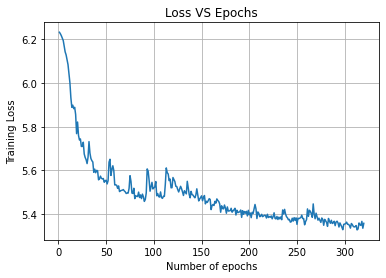

In [13]:
df = pd.read_csv("train.log")
df.epoch += 1
fig, ax = plt.subplots()
ax.plot(df['epoch'], df['loss'])

ax.set(xlabel='Number of epochs', ylabel='Training Loss',
       title='Loss VS Epochs')
ax.grid()
plt.show()